# Notebook to generate images for Powerpoint

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("sales.csv",parse_dates=['Month'], dayfirst=True)

In [3]:
df

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission,Mth,Over/Under
0,2021-01-01,Reza Jafari,Reza,Jafari,East,2954.70,Cash,15000,0.00,1,-12045.30
1,2021-01-01,Olivia Cheung,Olivia,Cheung,South,3008.40,Cash,15000,0.00,1,-11991.60
2,2021-01-01,Bryan Maldonado,Bryan,Maldonado,East,6796.80,Credit Card,15000,0.00,1,-8203.20
3,2021-01-01,Nina McDonald,Nina,McDonald,West,6945.40,On Account,15000,0.00,1,-8054.60
4,2021-01-01,Jason Jackaki,Jason,Jackaki,South,7221.60,On Account,15000,0.00,1,-7778.40
...,...,...,...,...,...,...,...,...,...,...,...
384,2021-12-01,Gordon Beswick,Gordon,Beswick,East,31970.80,Credit Card,15000,3197.08,12,16970.80
385,2021-12-01,Ashley Almanza,Ashley,Almanza,East,41520.00,Credit Card,15000,4152.00,12,26520.00
386,2021-12-01,Olivia Cheung,Olivia,Cheung,South,43593.60,Cash,15000,4359.36,12,28593.60
387,2021-12-01,Jonah Seitz,Jonah,Seitz,North,43974.00,Credit Card,15000,4397.40,12,28974.00


In [4]:
df["Performance"] = df["Over/Under"].apply(lambda x: 1 if x>0 else 0)

In [5]:
df.head()

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission,Mth,Over/Under,Performance
0,2021-01-01,Reza Jafari,Reza,Jafari,East,2954.70,Cash,15000,0.00,1,-12045.30,0
1,2021-01-01,Olivia Cheung,Olivia,Cheung,South,3008.40,Cash,15000,0.00,1,-11991.60,0
2,2021-01-01,Bryan Maldonado,Bryan,Maldonado,East,6796.80,Credit Card,15000,0.00,1,-8203.20,0
3,2021-01-01,Nina McDonald,Nina,McDonald,West,6945.40,On Account,15000,0.00,1,-8054.60,0
4,2021-01-01,Jason Jackaki,Jason,Jackaki,South,7221.60,On Account,15000,0.00,1,-7778.40,0


In [6]:
df.Performance.value_counts()

1    217
0    172
Name: Performance, dtype: int64

In [10]:
217/389 * 100

55.78406169665809

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Month         389 non-null    datetime64[ns]
 1   Employee      389 non-null    object        
 2   First_Name    389 non-null    object        
 3   Last_Name     389 non-null    object        
 4   Sales_Area    389 non-null    object        
 5   Sales_Amount  389 non-null    float64       
 6   Payment_Type  389 non-null    object        
 7   Targets       389 non-null    int64         
 8   Commission    389 non-null    float64       
 9   Mth           389 non-null    int64         
 10  Over/Under    389 non-null    float64       
 11  Performance   389 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 36.6+ KB


In [7]:
df.describe(include='all')

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission,Mth,Over/Under,Performance
count,389,389,389,389,389,389.00,389,389.00,389.00,389.00,389.00,389.00
unique,12,20,20,20,4,NaN,3,NaN,NaN,NaN,NaN,NaN
top,2021-03-01 00:00:00,Annabel Mettick,Annabel,Mettick,South,NaN,Cash,NaN,NaN,NaN,NaN,NaN
freq,47,30,30,30,99,NaN,140,NaN,NaN,NaN,NaN,NaN
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,18731.49,NaN,15000.00,1470.64,6.41,3731.49,0.56
std,NaN,NaN,NaN,NaN,NaN,11152.19,NaN,0.00,1476.78,3.43,11152.19,0.50
min,NaN,NaN,NaN,NaN,NaN,2070.30,NaN,15000.00,0.00,1.00,-12929.70,0.00
25%,NaN,NaN,NaN,NaN,NaN,9697.60,NaN,15000.00,0.00,3.00,-5302.40,0.00


In [8]:
df.columns

Index(['Month', 'Employee', 'First_Name', 'Last_Name', 'Sales_Area', 'Sales_Amount', 'Payment_Type', 'Targets', 'Commission', 'Mth', 'Over/Under', 'Performance'], dtype='object')

### Groupby Function

In [9]:
df.groupby(["Mth"]).mean()

,Sales_Amount,Targets,Commission,Over/Under,Performance
Mth,,,,,
1,17191.18,15000.00,1308.21,2191.18,0.53
2,18547.73,15000.00,1523.37,3547.73,0.57
3,18069.55,15000.00,1272.73,3069.55,0.47
4,21020.69,15000.00,1755.71,6020.69,0.67
5,20579.43,15000.00,1711.42,5579.43,0.68
6,16997.47,15000.00,1254.61,1997.47,0.52
7,17518.32,15000.00,1343.82,2518.32,0.53
8,17383.65,15000.00,1324.71,2383.65,0.50
9,18165.86,15000.00,1398.61,3165.86,0.54


In [10]:
month_sales = pd.DataFrame(df.groupby(["Mth"]).mean())
month_sales

,Sales_Amount,Targets,Commission,Over/Under,Performance
Mth,,,,,
1,17191.18,15000.00,1308.21,2191.18,0.53
2,18547.73,15000.00,1523.37,3547.73,0.57
3,18069.55,15000.00,1272.73,3069.55,0.47
4,21020.69,15000.00,1755.71,6020.69,0.67
5,20579.43,15000.00,1711.42,5579.43,0.68
6,16997.47,15000.00,1254.61,1997.47,0.52
7,17518.32,15000.00,1343.82,2518.32,0.53
8,17383.65,15000.00,1324.71,2383.65,0.50
9,18165.86,15000.00,1398.61,3165.86,0.54


In [11]:
df.groupby(["Sales_Area"]).mean()

,Sales_Amount,Targets,Commission,Mth,Over/Under,Performance
Sales_Area,,,,,,
East,18810.77,15000.00,1538.53,6.22,3810.77,0.59
North,20269.10,15000.00,1637.17,7.00,5269.10,0.59
South,18308.04,15000.00,1399.52,6.87,3308.04,0.55
West,17575.39,15000.00,1312.87,5.57,2575.39,0.50


In [12]:
area_sales = pd.DataFrame(df.groupby(["Sales_Area"]).mean())
area_sales

,Sales_Amount,Targets,Commission,Mth,Over/Under,Performance
Sales_Area,,,,,,
East,18810.77,15000.00,1538.53,6.22,3810.77,0.59
North,20269.10,15000.00,1637.17,7.00,5269.10,0.59
South,18308.04,15000.00,1399.52,6.87,3308.04,0.55
West,17575.39,15000.00,1312.87,5.57,2575.39,0.50


In [13]:
df.groupby(["Employee"]).sum()

,Sales_Amount,Targets,Commission,Mth,Over/Under,Performance
Employee,,,,,,
Ally Bryant,423881.00,405000,26723.02,143,18881.00,11
Annabel Mettick,482889.00,450000,31747.24,200,32889.00,13
Ashley Almanza,368364.80,285000,32536.57,126,83364.80,13
Bryan Maldonado,227895.80,210000,14451.27,74,17895.80,6
Charlotte Edwards,335128.90,255000,27008.95,120,80128.90,10
Chloe Fusaro,517004.60,375000,43547.73,147,142004.60,16
Cory Goodwin,323152.30,270000,25370.02,140,53152.30,11
David Wilkinson,289580.80,225000,21597.21,87,64580.80,8
Derek Godwin,371911.90,300000,33709.94,134,71911.90,14


In [14]:
employee_sales = pd.DataFrame(df.groupby(["Employee"]).sum())
employee_sales

,Sales_Amount,Targets,Commission,Mth,Over/Under,Performance
Employee,,,,,,
Ally Bryant,423881.00,405000,26723.02,143,18881.00,11
Annabel Mettick,482889.00,450000,31747.24,200,32889.00,13
Ashley Almanza,368364.80,285000,32536.57,126,83364.80,13
Bryan Maldonado,227895.80,210000,14451.27,74,17895.80,6
Charlotte Edwards,335128.90,255000,27008.95,120,80128.90,10
Chloe Fusaro,517004.60,375000,43547.73,147,142004.60,16
Cory Goodwin,323152.30,270000,25370.02,140,53152.30,11
David Wilkinson,289580.80,225000,21597.21,87,64580.80,8
Derek Godwin,371911.90,300000,33709.94,134,71911.90,14


In [15]:
df.groupby(["Performance"]).mean()

,Sales_Amount,Targets,Commission,Mth,Over/Under
Performance,,,,,
0,9103.20,15000.00,0.00,6.34,-5896.80
1,26363.14,15000.00,2636.31,6.47,11363.14


In [9]:
df.groupby(['Payment_Type']).mean()

,Sales_Amount,Targets,Commission,Mth,Over/Under,Performance
Payment_Type,,,,,,
Cash,18644.70,15000.00,1476.11,6.26,3644.70,0.57
Credit Card,18713.53,15000.00,1469.14,6.55,3713.53,0.55
On Account,18849.78,15000.00,1465.93,6.44,3849.78,0.55


## Data Visualization

### Univariate Data Exploration

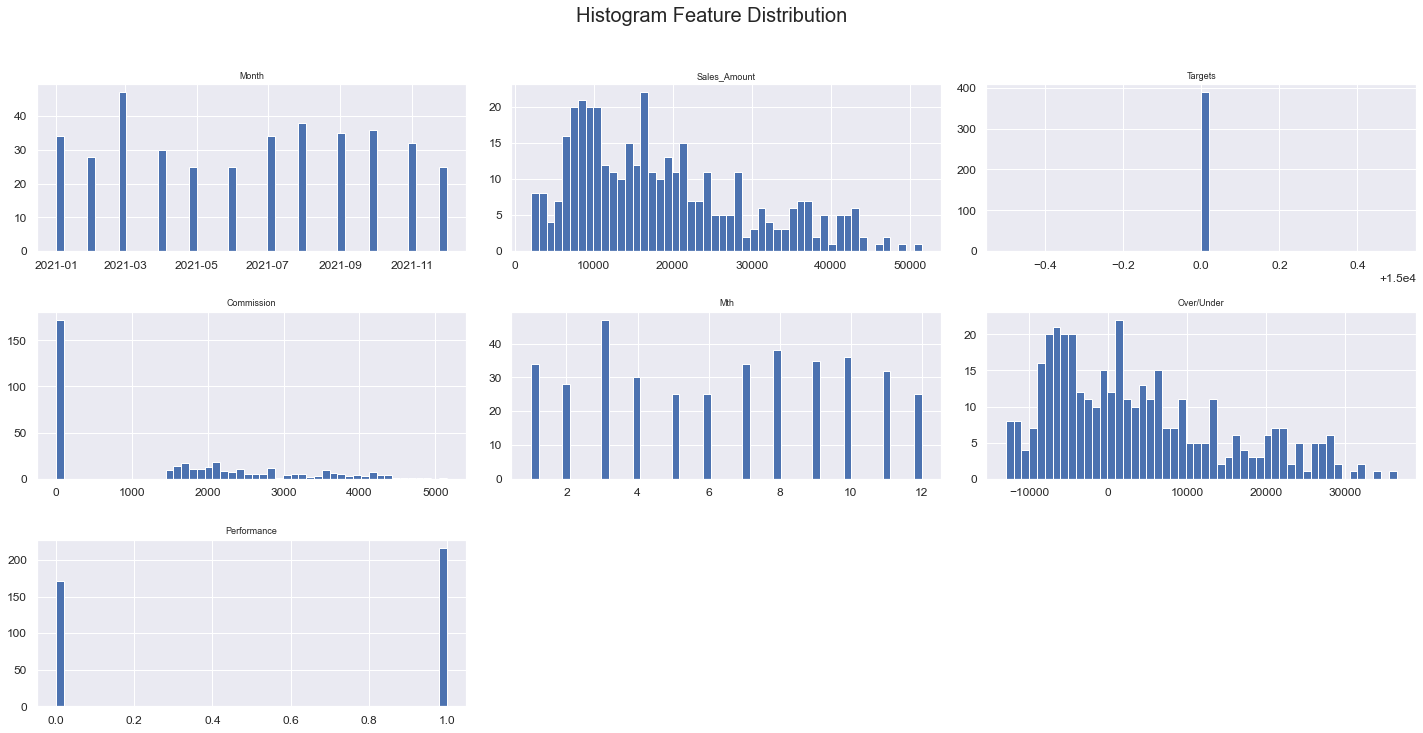

In [16]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

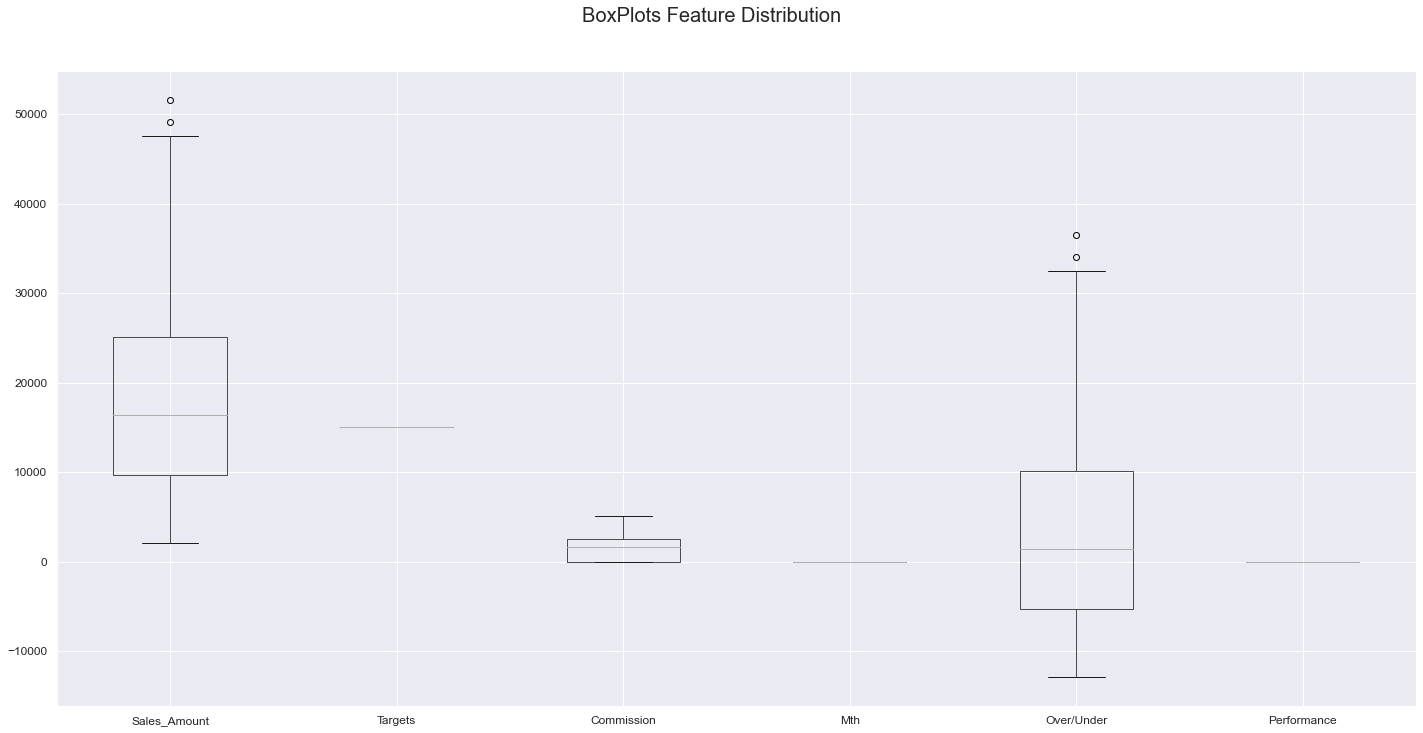

In [17]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

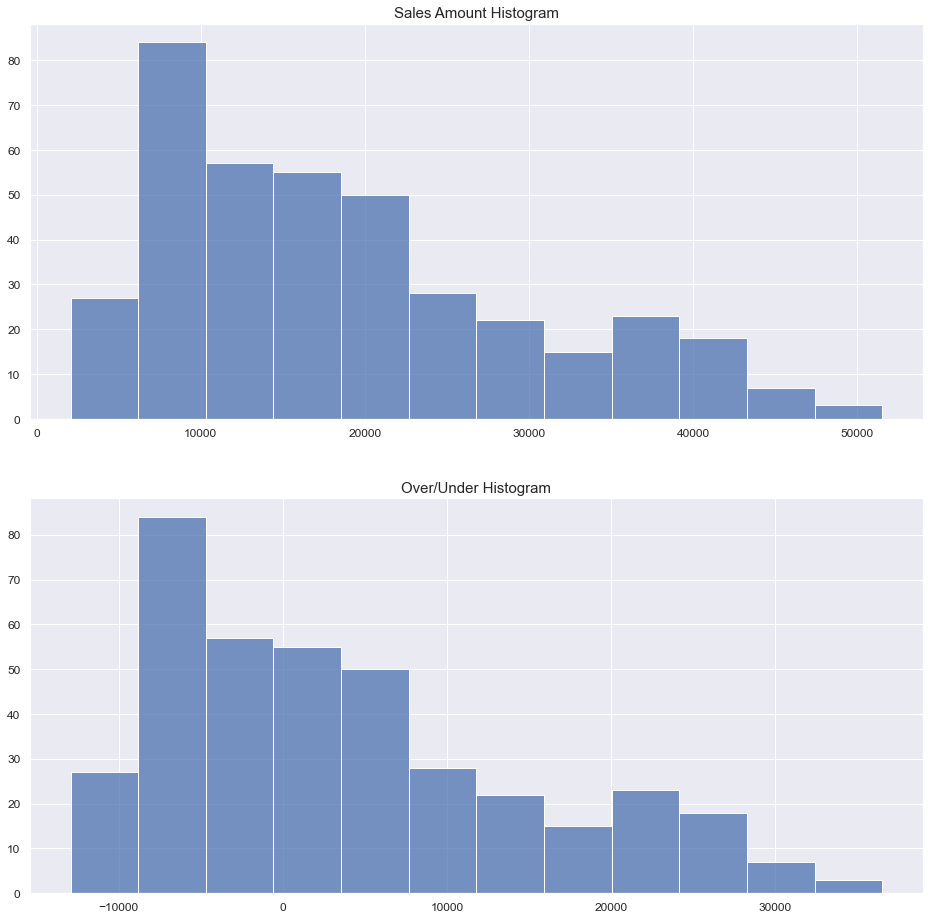

In [18]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.histplot(x="Sales_Amount", data=df, ax=ax[0])
ax[0].set_title('Sales Amount Histogram', size=15)
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.histplot(x="Over/Under", data=df, ax=ax[1])
ax[1].set_title('Over/Under Histogram', size=15)
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

plt.show()

<Figure size 1440x1440 with 0 Axes>

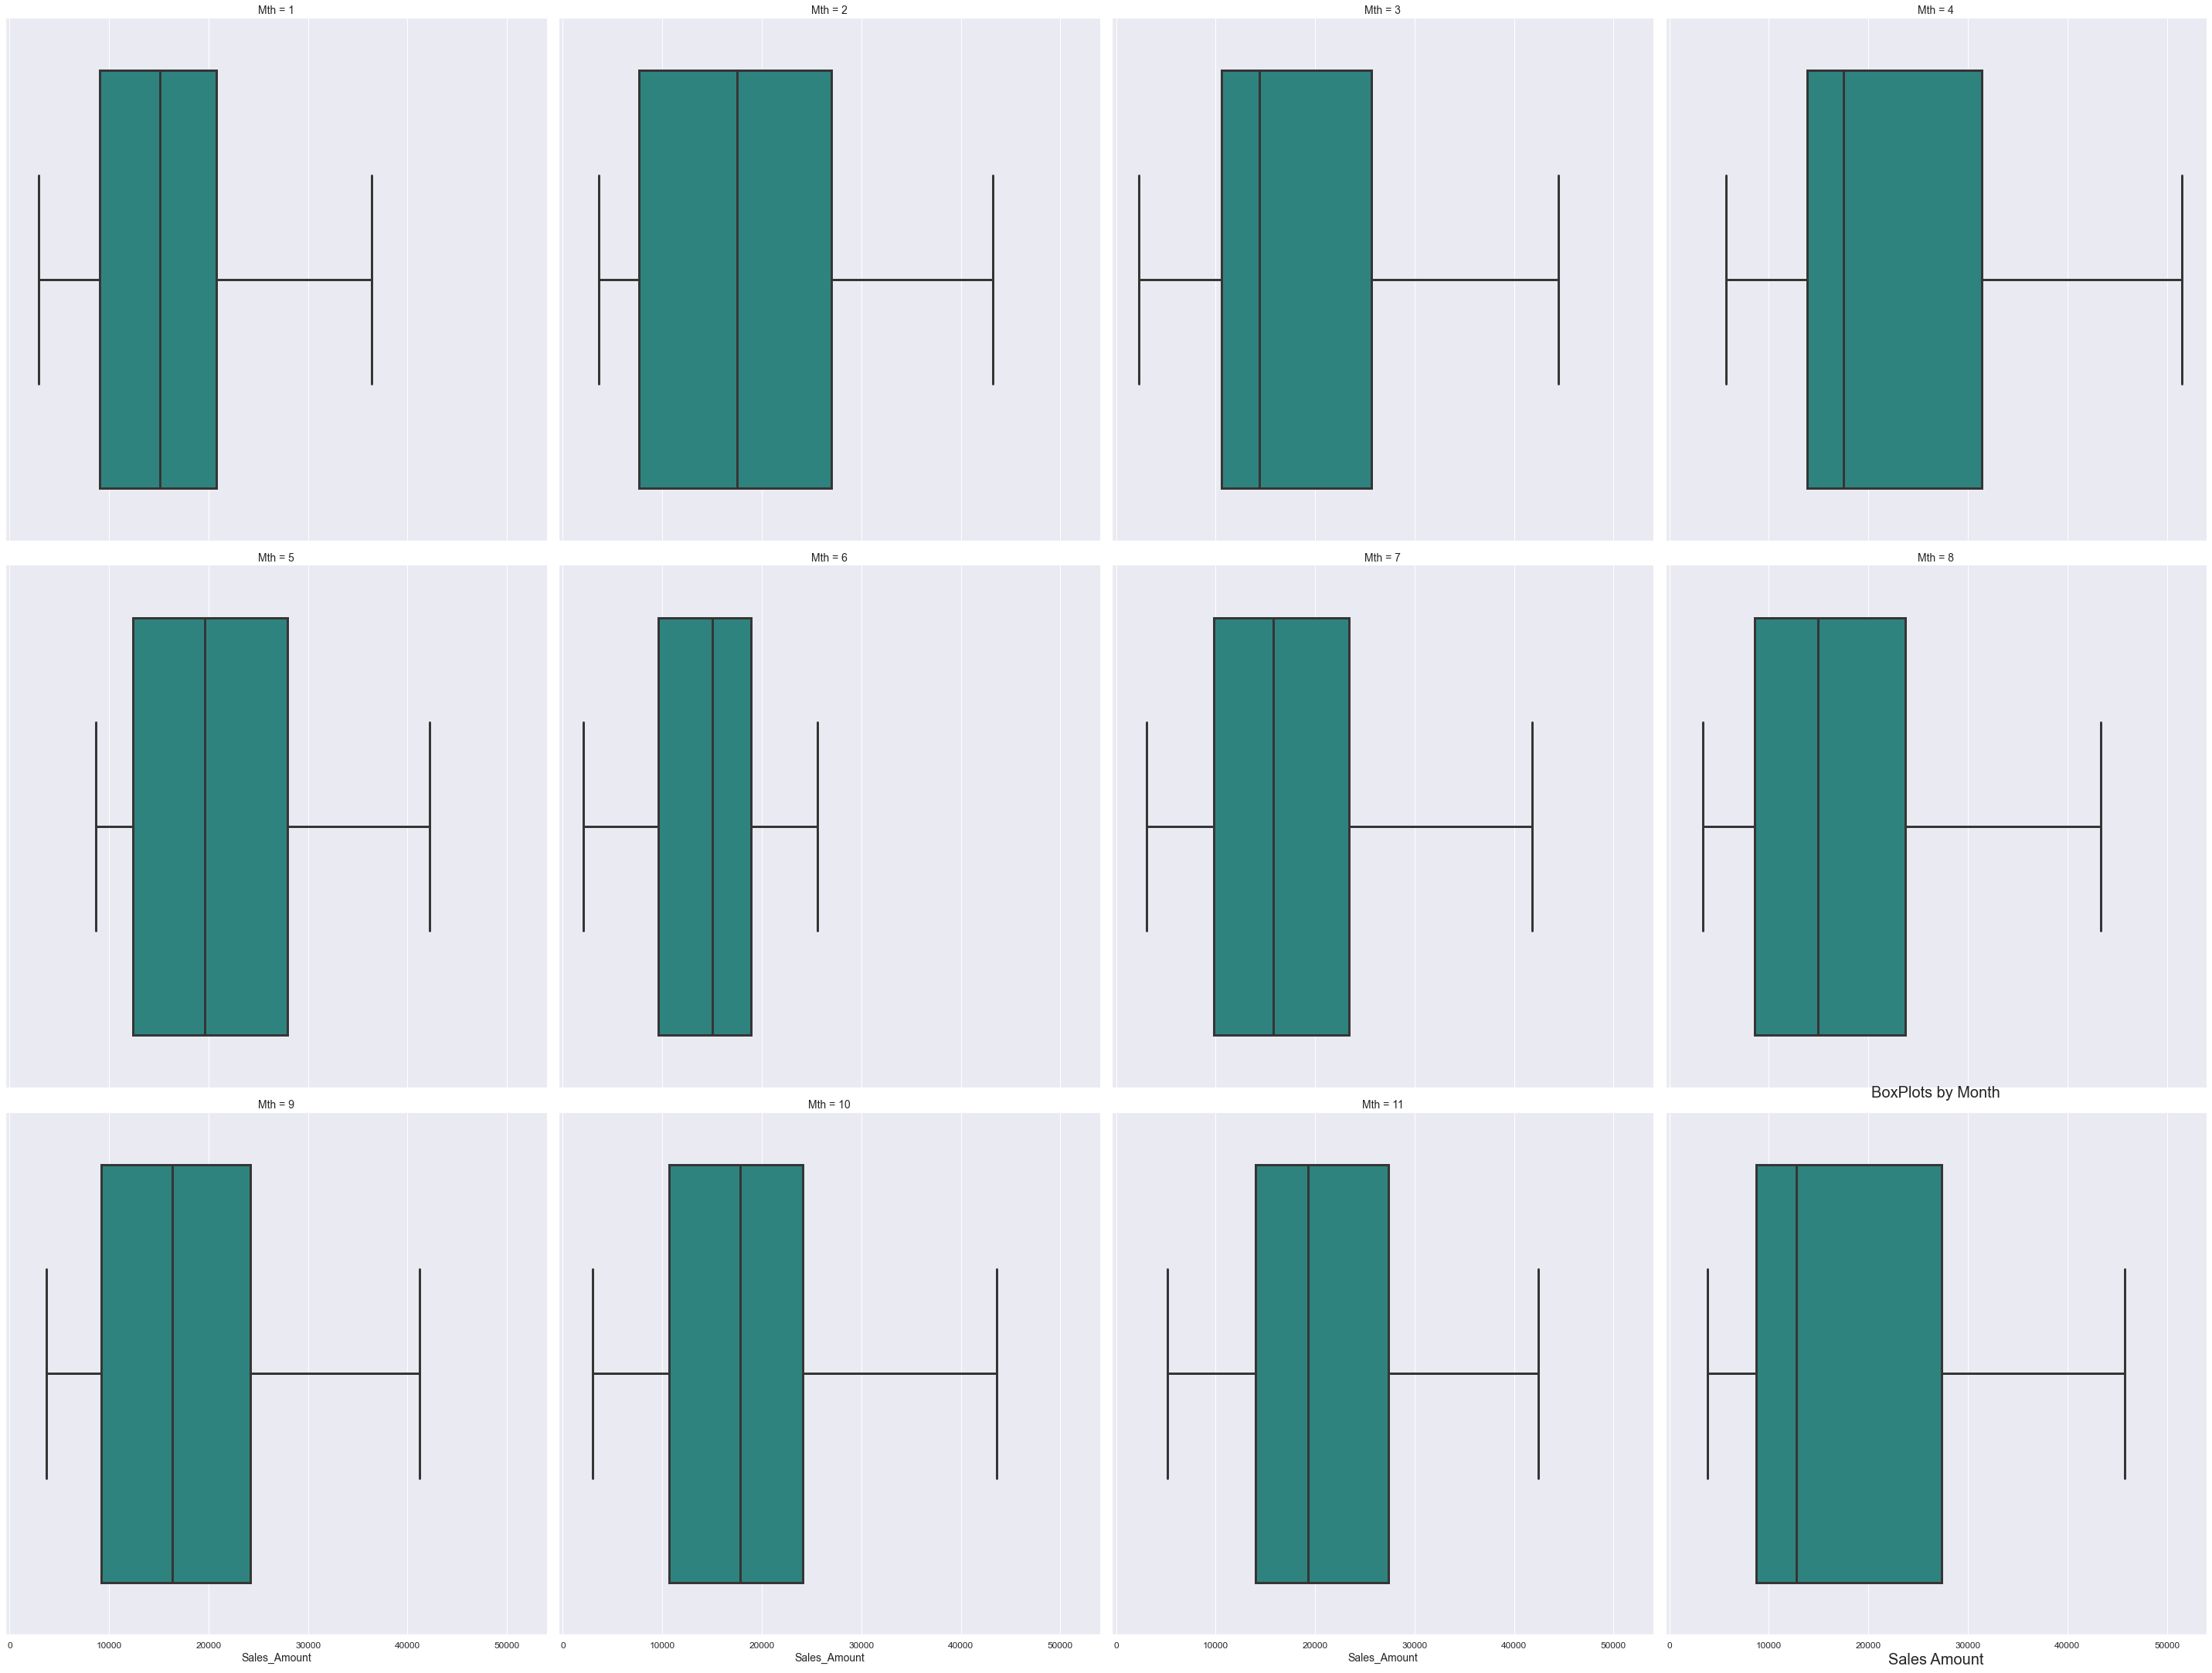

In [19]:
plt.figure(figsize=(20,20))

sns.catplot(x="Sales_Amount", ci=None,  col="Mth", col_wrap=4, 

                data=df, color=None, linewidth=3, showfliers = False,

                orient="h", height=10, aspect=1, palette='viridis',

                kind="box", dodge=True)

plt.xlabel("Sales Amount", size=20)
plt.ylabel("", size=20)
plt.title('BoxPlots by Month', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

## Time-Series Analysis

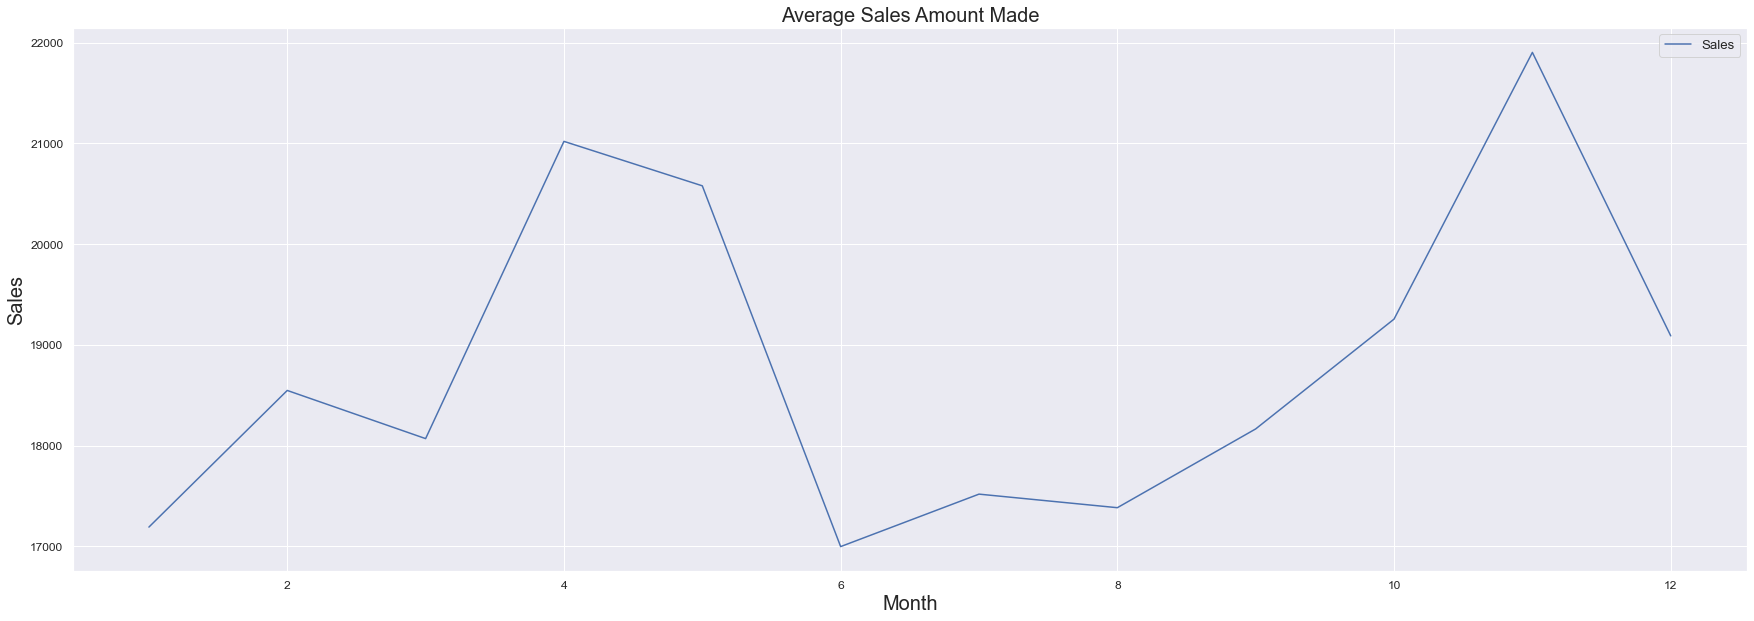

In [20]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=month_sales.index,y=month_sales.Sales_Amount,data=month_sales, estimator=None)
plt.title("Average Sales Amount Made", fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Sales", fontsize=20)
plt.legend(['Sales'])
plt.show()

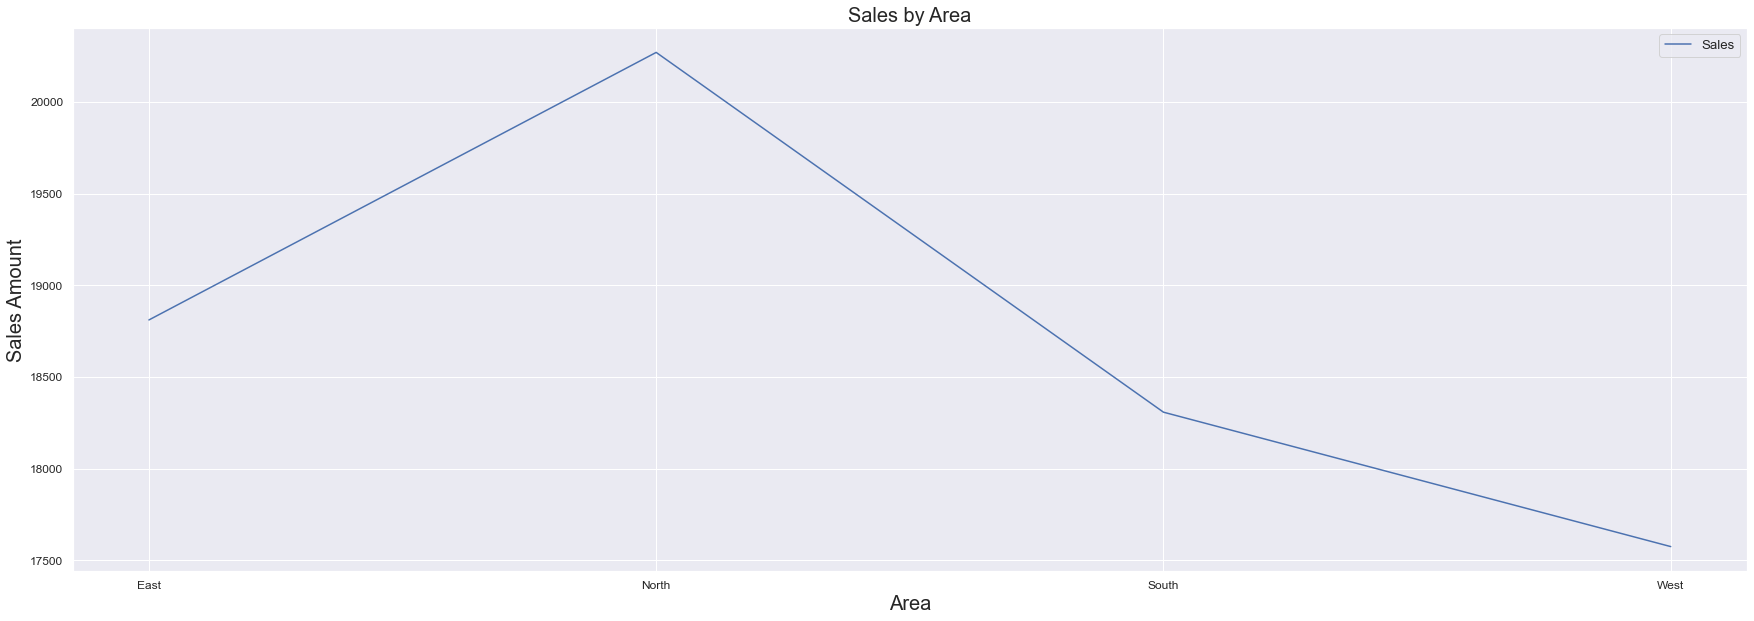

In [21]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=area_sales.index,y=area_sales.Sales_Amount,data=area_sales, estimator='mean')
plt.title("Sales by Area", fontsize=20)
plt.xlabel("Area", fontsize=20)
plt.ylabel("Sales Amount", fontsize=20)
plt.legend(['Sales'])
plt.show()

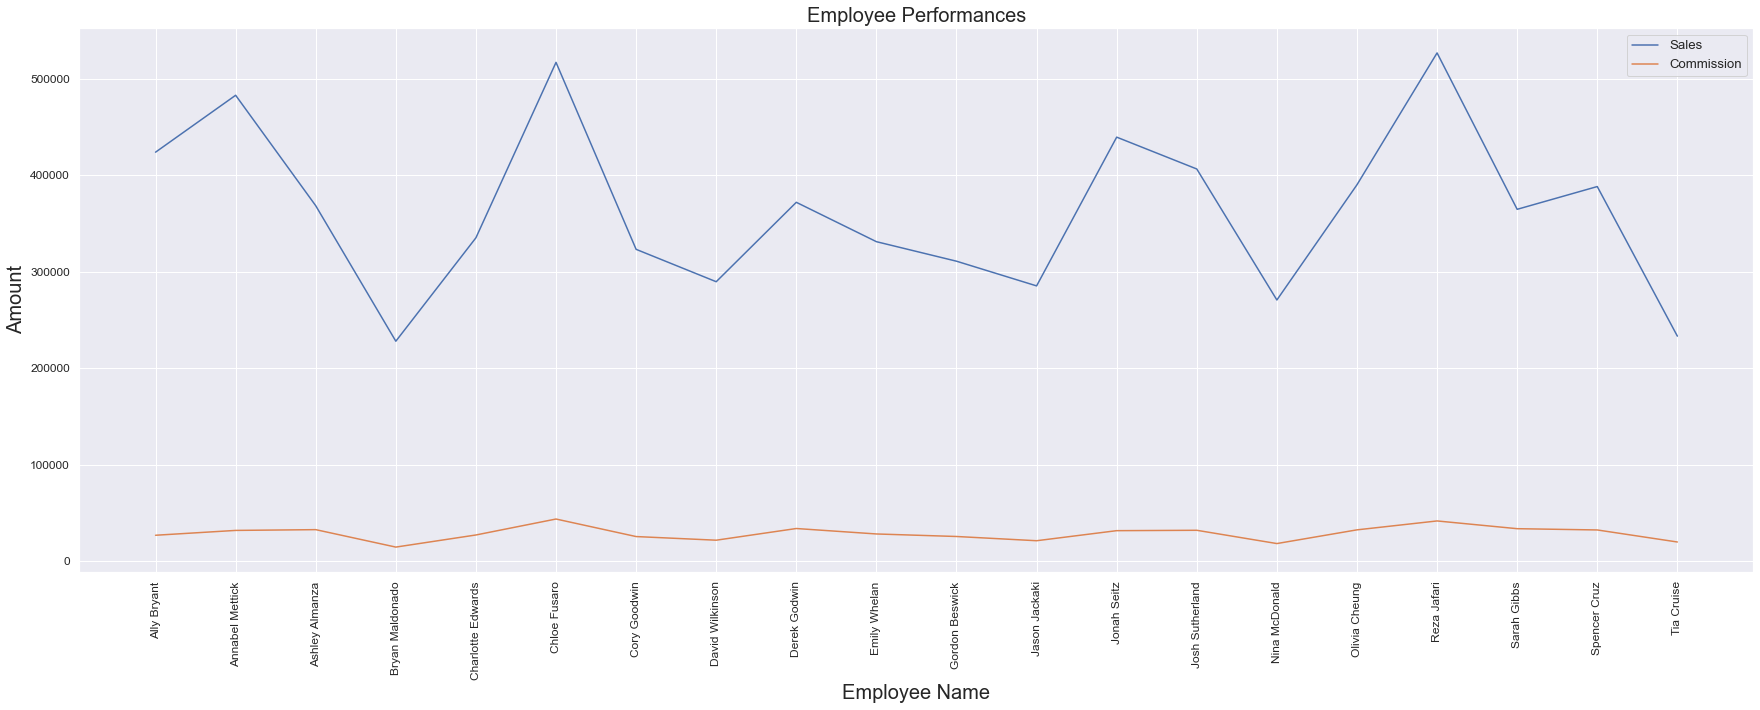

In [22]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=employee_sales.index,y=employee_sales.Sales_Amount, data=employee_sales, estimator=None)
sns.lineplot(x=employee_sales.index,y=employee_sales.Commission, data=employee_sales, estimator=None)
plt.title("Employee Performances", fontsize=20)
plt.xlabel("Employee Name", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Amount", fontsize=20)
plt.legend(['Sales','Commission'])
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

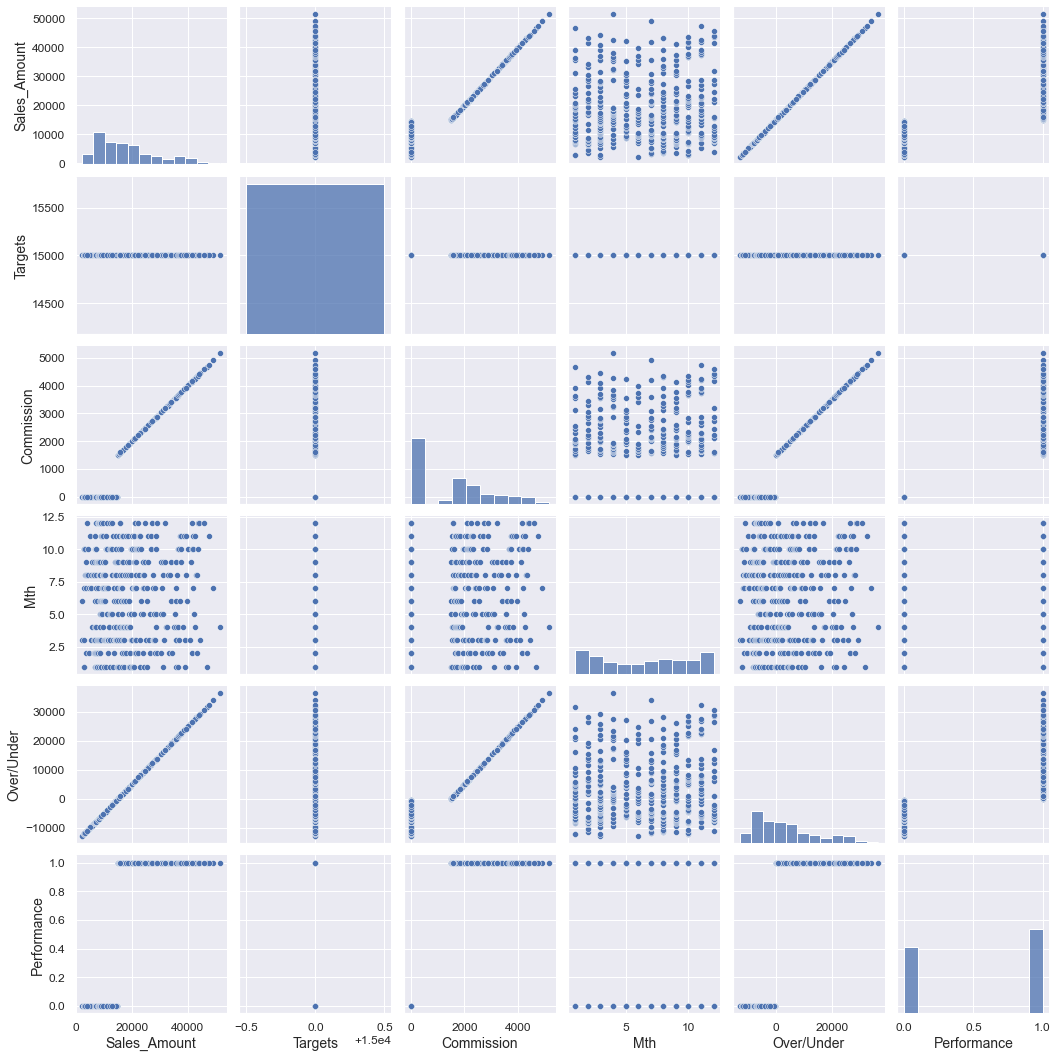

In [23]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df)
plt.show()

### Correlation

In [24]:
df.corr()

,Sales_Amount,Targets,Commission,Mth,Over/Under,Performance
Sales_Amount,1.00,NaN,0.96,0.04,1.00,0.77
Targets,NaN,NaN,NaN,NaN,NaN,NaN
Commission,0.96,NaN,1.00,0.04,0.96,0.89
Mth,0.04,NaN,0.04,1.00,0.04,0.02
Over/Under,1.00,NaN,0.96,0.04,1.00,0.77
Performance,0.77,NaN,0.89,0.02,0.77,1.00


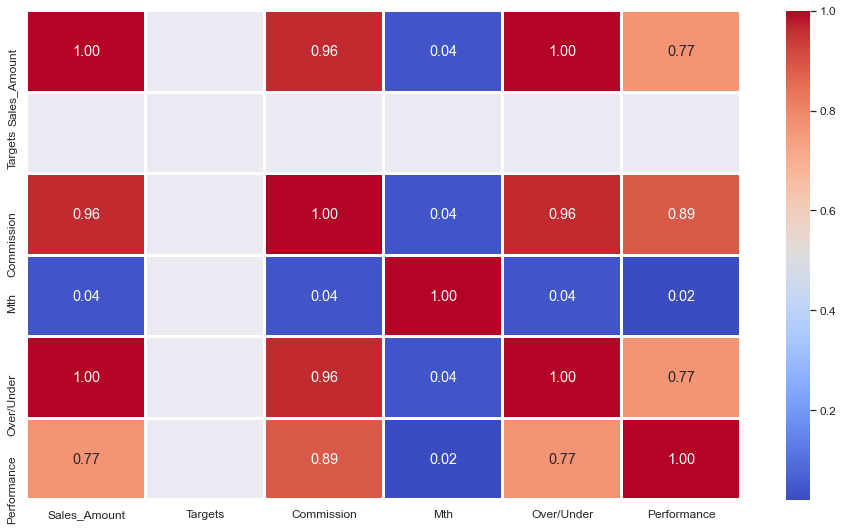

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

### Drop unwanted features

In [26]:
df.columns

Index(['Month', 'Employee', 'First_Name', 'Last_Name', 'Sales_Area', 'Sales_Amount', 'Payment_Type', 'Targets', 'Commission', 'Mth', 'Over/Under', 'Performance'], dtype='object')

In [27]:
df.drop(['Month', 'Employee', 'First_Name', 'Last_Name','Targets', 'Commission','Over/Under'], axis=1, inplace=True)

In [28]:
df.head()

,Sales_Area,Sales_Amount,Payment_Type,Mth,Performance
0,East,2954.70,Cash,1,0
1,South,3008.40,Cash,1,0
2,East,6796.80,Credit Card,1,0
3,West,6945.40,On Account,1,0
4,South,7221.60,On Account,1,0


### Treat Missing Values

In [29]:
df.isnull().sum()

Sales_Area      0
Sales_Amount    0
Payment_Type    0
Mth             0
Performance     0
dtype: int64

### Save to CSV

In [30]:
#df.to_csv("train.csv", index=False)

## Regression Analysis

## Logistic Regression (StatsModel)

In [31]:
df.columns

Index(['Sales_Area', 'Sales_Amount', 'Payment_Type', 'Mth', 'Performance'], dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales_Area    389 non-null    object 
 1   Sales_Amount  389 non-null    float64
 2   Payment_Type  389 non-null    object 
 3   Mth           389 non-null    int64  
 4   Performance   389 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 15.3+ KB


In [33]:
df["Mth"] = df["Mth"].astype("category")

In [34]:
logitfit = smf.logit(formula = 'Performance ~ Sales_Amount + C(Payment_Type) + C(Sales_Area) + C(Mth)', 
                     data = df).fit(method='bfgs')

         Current function value: 0.048695
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 38


In [35]:
logitfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Performance   No. Observations:                  389
Model:                          Logit   Df Residuals:                      371
Method:                           MLE   Df Model:                           17
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.9291
Time:                        08:45:43   Log-Likelihood:                -18.942
converged:                      False   LL-Null:                       -267.03
Covariance Type:            nonrobust   LLR p-value:                 1.215e-94
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -25.8484      6.175     -4.186      0.000     -37.950     -13.747
C(Payment_Type)[T.Credit Card]    -1.1625      1.302     -0.893      0.372      -3.715       1.390
C(Payment_Type)[T.On Account]      0.2937      1.248      0.235      0.814      -2.152       2.740
C(Sales_Area)[T.North]            -2.9904      1.603     -1.866      0.062      -6.131       0.151
C(Sales_Area)[T.South]            -5.1314      1.969     -2.606      0.009      -8.991      -1.272
C(Sales_Area)[T.West]             -1.6760      1.690     -0.992      0.321      -4.988       1.636
C(Mth)[T.2]                       -1.8572      2.987     -0.622      0.534      -7.711       3.996
C(Mth)[T.3]                       -4.2768      2.286     -1.871      0.061      -8.758       0.205
C(Mth)[T.4]                       -0.8281      1.885     -0.439      0.660      -4.523       2.866
C(Mth)[T.5]                       -1.2881      2.774     -0.464      0.642      -6.726       4.149
C(Mth)[T.6]                       -2.4983      2.137     -1.169      0.242      -6.686       1.690
C(Mth)[T.7]                       -2.1345      2.423     -0.881      0.378      -6.884       2.615
C(Mth)[T.8]                       -2.1736      2.367     -0.918      0.358      -6.812       2.465
C(Mth)[T.9]                       -2.1110      2.330     -0.906      0.365      -6.677       2.455
C(Mth)[T.10]                      -2.6740      1.955     -1.368      0.171      -6.506       1.158
C(Mth)[T.11]                      -0.1836      2.125     -0.086      0.931      -4.349       3.982
C(Mth)[T.12]                      -1.6902      2.468     -0.685      0.493      -6.528       3.148
Sales_Amount                       0.0021      0.000      4.176      0.000       0.001       0.003
==================================================================================================

Possibly complete quasi-separation: A fraction 0.70 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [36]:
-----------------

SyntaxError: invalid syntax (<ipython-input-36-92215d4ede0b>, line 1)

### Logistic Regression (SKLearn)

In [ ]:
df.shape

In [ ]:
X = df.iloc[:,:4]
y = df.iloc[:,4]

In [ ]:
Counter(y)

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
Counter(y_train), Counter(y_test)

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
plot_confusion_matrix(estimator=lr, X=X_test, y_true=y_test, cmap='YlGnBu')
plt.show()

In [ ]:
plot_roc_curve(estimator=lr, X=X_test, y=y_test)
plt.show()

#### Python code done by Dennis Lam